In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
import neattext.functions as nfx

In [4]:
csv_path = "S:\\ML-Project\\Emotion-Detection\\Emotion-Detection-ML\\data\\emotion_detection.csv"
csv_path2="S:\\ML-Project\\Emotion-Detection\\Emotion-Detection-ML\\data\\emotion_dataset.csv"


df = pd.read_csv(csv_path2)

In [5]:
df.head()

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,NaN
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...


In [6]:
df.shape

(34792, 4)

In [7]:
df.dtypes


Unnamed: 0     int64
Emotion       object
Text          object
Clean_Text    object
dtype: object

In [8]:
df.isnull().sum()

Unnamed: 0      0
Emotion         0
Text            0
Clean_Text    466
dtype: int64

In [9]:
df['Emotion'].value_counts()

Emotion
joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: count, dtype: int64

<Axes: xlabel='Emotion'>

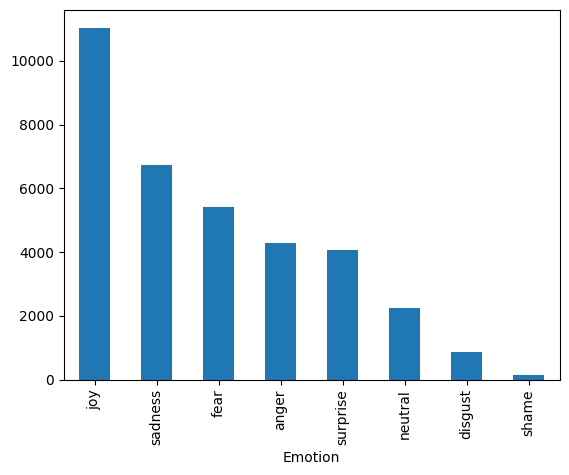

In [10]:
df['Emotion'].value_counts().plot(kind='bar')

<Axes: xlabel='count', ylabel='Emotion'>

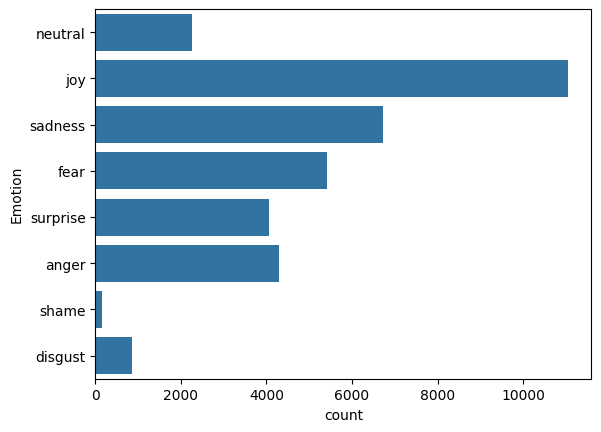

In [11]:
sns.countplot(df['Emotion'])

### Exploration
+ Sentiment Analysis
+ Keyword Extraction
    -Keywords for each emotion
    -Worldcloud

In [12]:
from textblob import TextBlob

In [13]:
def get_sentiment(text):
    blob= TextBlob(text)
    sentiment =blob.sentiment.polarity
    if sentiment>0:
        result="Positive"
    elif sentiment<0:
        result="Negative"
    else:
        result="Neutral"
    return result
    

In [14]:
get_sentiment("I love coding")

'Positive'

In [15]:
df["Sentiment"]=df["Text"].apply(get_sentiment)

In [16]:
df.head()

,Unnamed: 0,Emotion,Text,Clean_Text,Sentiment
0,0,neutral,Why ?,NaN,Neutral
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow,Neutral
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...,Negative
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...,Positive
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...,Neutral


In [17]:
df.groupby(["Emotion","Sentiment"]).size()

Emotion   Sentiment
anger     Negative     1787
          Neutral      1386
          Positive     1124
disgust   Negative      325
          Neutral       249
          Positive      282
fear      Negative     1535
          Neutral      1843
          Positive     2032
joy       Negative     1682
          Neutral      3648
          Positive     5715
neutral   Negative      178
          Neutral      1523
          Positive      553
sadness   Negative     2630
          Neutral      2127
          Positive     1965
shame     Negative       46
          Neutral        50
          Positive       50
surprise  Negative      623
          Neutral      1546
          Positive     1893
dtype: int64

<Axes: xlabel='Emotion,Sentiment'>

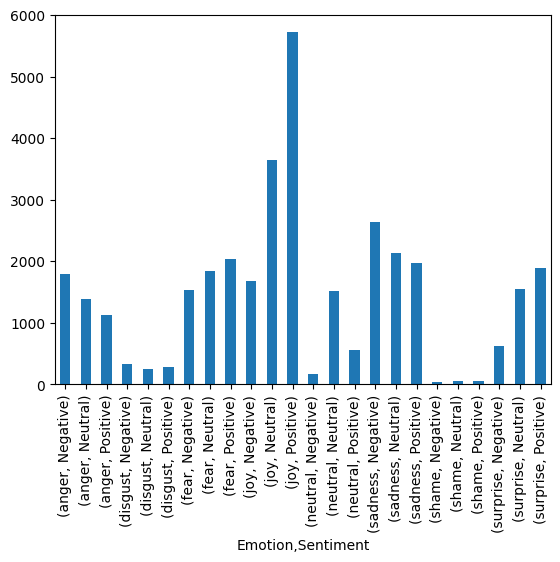

In [18]:
df.groupby(["Emotion","Sentiment"]).size().plot(kind="bar")

In [19]:

sns.catplot

<function seaborn.categorical.catplot(data=None, *, x=None, y=None, hue=None, row=None, col=None, kind='strip', estimator='mean', errorbar=('ci', 95), n_boot=1000, seed=None, units=None, weights=None, order=None, hue_order=None, row_order=None, col_order=None, col_wrap=None, height=5, aspect=1, log_scale=None, native_scale=False, formatter=None, orient=None, color=None, palette=None, hue_norm=None, legend='auto', legend_out=True, sharex=True, sharey=True, margin_titles=False, facet_kws=None, ci=<deprecated>, **kwargs)>

C:\Users\Sk190\AppData\Local\Temp\ipykernel_14576\4186563536.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Emotion", data=df, palette="coolwarm")  # 🔥 Try different palettes


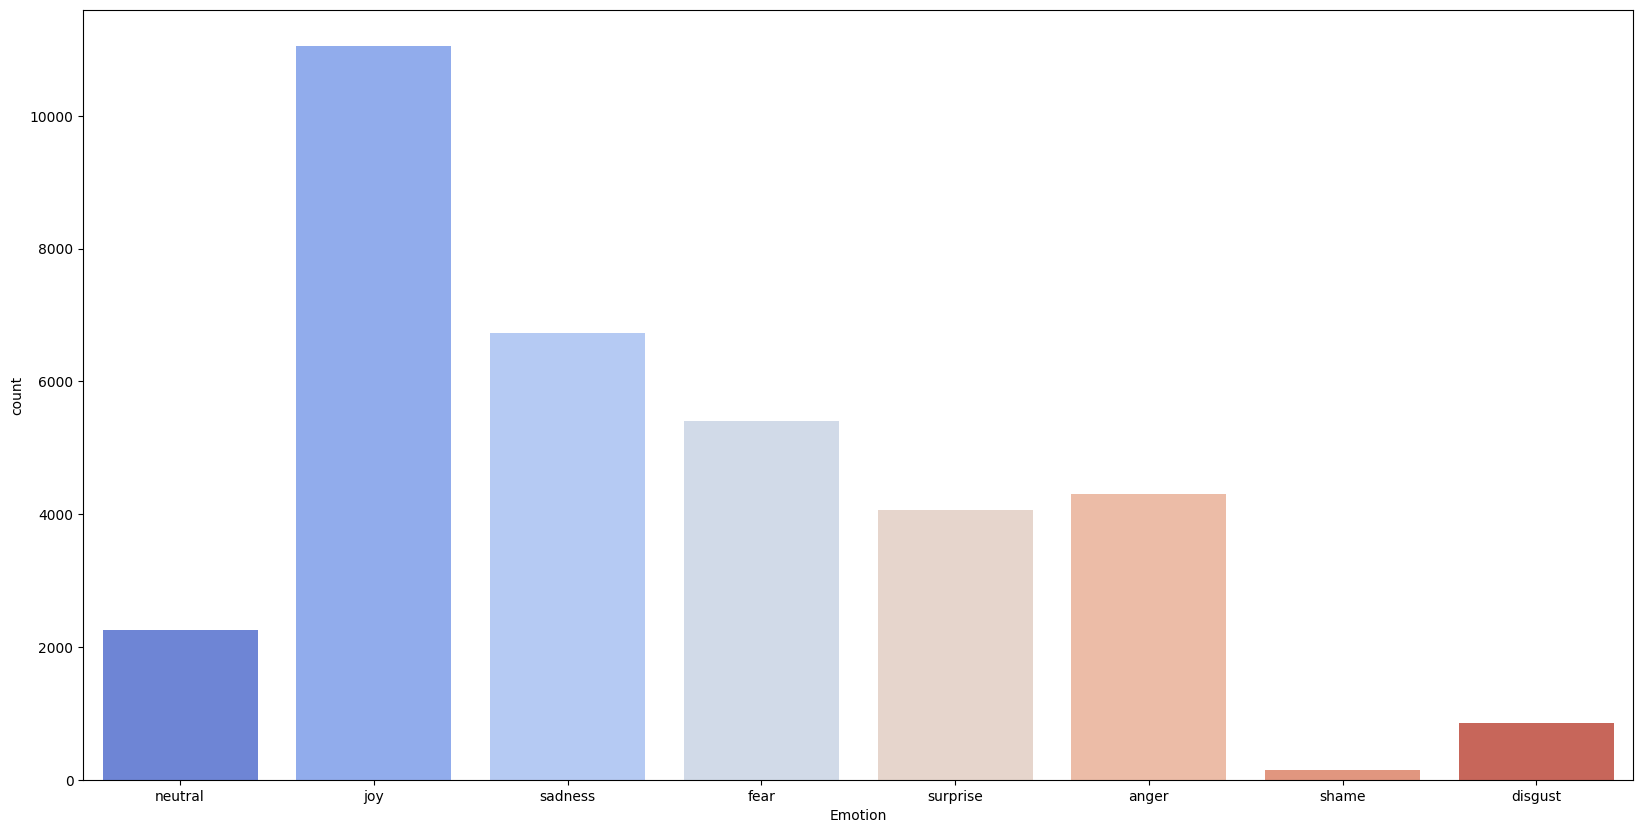

In [20]:
plt.figure(figsize=(20, 10))

# `palette` parameter ka use karke colorful graph
sns.countplot(x="Emotion", data=df, palette="coolwarm")  # 🔥 Try different palettes

plt.show()

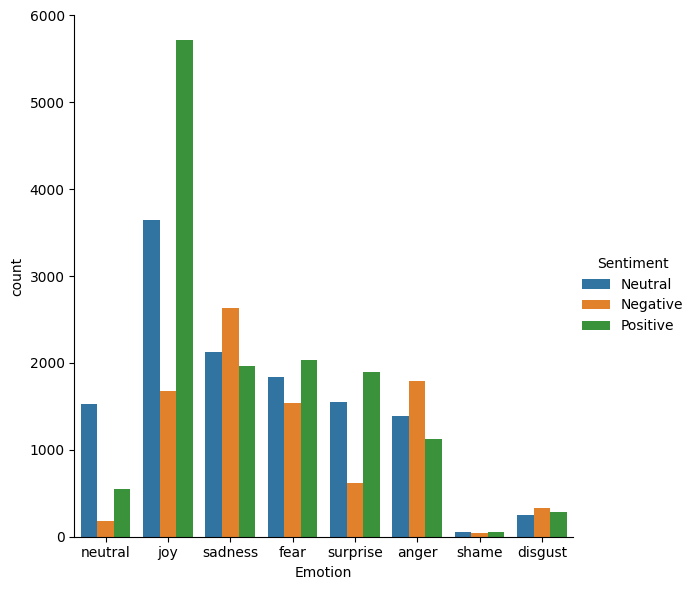

In [21]:
sns.catplot(x="Emotion", hue="Sentiment", data=df, kind="count", height=6, aspect=1)

### text cleaning
+ Remove Noise
    - stopwords
    - special character
    - punctuation
    - emojis

In [22]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [23]:
df['Text']

0                                                   Why ? 
1          Sage Act upgrade on my to do list for tommorow.
2        ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3         Such an eye ! The true hazel eye-and so brill...
4        @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...
                               ...                        
34787    @MichelGW have you gift! Hope you like it! It'...
34788    The world didnt give it to me..so the world MO...
34789                             A man robbed me today . 
34790    Youu call it JEALOUSY, I call it of #Losing YO...
34791    I think about you baby, and I dream about you ...
Name: Text, Length: 34792, dtype: object

In [24]:
df['Clean_Text']=df['Text'].apply(nfx.remove_stopwords)

In [25]:
df['Clean_Text']=df['Clean_Text'].apply(nfx.remove_userhandles)

In [26]:
df['Clean_Text']=df['Clean_Text'].apply(nfx.remove_punctuations)

In [27]:
df[['Text','Clean_Text']]

,Text,Clean_Text
0,Why ?,
1,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...
...,...,...
34787,@MichelGW have you gift! Hope you like it! It'...,gift Hope like it hand wear Itll warm Lol
34788,The world didnt give it to me..so the world MO...,world didnt meso world DEFINITELY cnt away
34789,A man robbed me today .,man robbed today
34790,"Youu call it JEALOUSY, I call it of #Losing YO...",Youu JEALOUSY #Losing YOU


### extract keywords
+ Extract most common words per class of emotion

In [28]:
from collections import Counter

In [29]:
def extract_keywords(text,num=50):
    tokens=[tok for tok in text.split()]
    most_common_tokens=Counter(tokens).most_common(num)
    return dict(most_common_tokens)

In [30]:
emotion_list=df['Emotion'].unique().tolist()

In [31]:
emotion_list

['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame', 'disgust']

In [32]:
df[df['Emotion']=='joy']

,Unnamed: 0,Emotion,Text,Clean_Text,Sentiment
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow,Neutral
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...,Positive
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...,Neutral
12,12,joy,"For once in his life , Leopold must have been ...",life Leopold truly happy : hopes prayers belo...,Positive
17,17,joy,I have a feeling i will fail french #fuckfrench,feeling fail french #fuckfrench,Negative
...,...,...,...,...,...
34778,34778,joy,"In other news, my mum made EFO.",news mum EFO,Negative
34784,34784,joy,~ As musicas que nois danço com os munitores t...,~ musicas que nois danço com os munitores todo...,Positive
34785,34785,joy,When I understood that I was admitted to the U...,understood admitted University,Neutral
34786,34786,joy,Tuesday woken up to Oscar and Cornet practice X,Tuesday woken Oscar Cornet practice X,Neutral


In [33]:
df[df['Emotion']=='joy']['Clean_Text']

1                           Sage Act upgrade list tommorow
3        eye  true hazel eyeand brilliant  Regular feat...
4          ugh babe hugggzzz u  babe naamazed nga ako e...
12       life  Leopold truly happy : hopes prayers belo...
17                         feeling fail french #fuckfrench
                               ...                        
34778                                         news mum EFO
34784    ~ musicas que nois danço com os munitores todo...
34785                       understood admitted University
34786                Tuesday woken Oscar Cornet practice X
34788           world didnt meso world DEFINITELY cnt away
Name: Clean_Text, Length: 11045, dtype: object

In [34]:
joy_list=df[df['Emotion']=='joy']['Clean_Text'].tolist()

In [35]:
#joy document
joy_docx=' '.join(joy_list)

In [36]:
keyword_joy=extract_keywords(joy_docx)

In [37]:
keyword_joy

{'day': 729,
 'amp': 678,
 'time': 602,
 'Im': 555,
 'work': 509,
 'like': 476,
 'today': 471,
 'tomorrow': 467,
 'Christmas': 453,
 'love': 393,
 'happy': 368,
 'good': 345,
 'night': 332,
 'got': 328,
 ':)': 311,
 'going': 304,
 'home': 302,
 'school': 297,
 'morning': 288,
 '2': 262,
 'joy': 257,
 'life': 251,
 'hours': 251,
 'week': 231,
 'feel': 227,
 'year': 225,
 'days': 208,
 'tonight': 205,
 'long': 204,
 'people': 201,
 'me': 196,
 'great': 194,
 'sleep': 185,
 'new': 181,
 'family': 181,
 's': 180,
 'God': 177,
 'know': 177,
 'hour': 172,
 'friend': 169,
 'felt': 167,
 'cant': 165,
 'it': 162,
 'feeling': 159,
 'RT': 159,
 'friends': 155,
 'think': 148,
 'excited': 145,
 'right': 142,
 'class': 141}

In [38]:
def plot_most_common_word(mydict, emotion_name):
    df_01=pd.DataFrame(mydict.items(),columns=['token','count'])
    plt.figure(figsize=(20,10))
    plt.title("plot of {} Most Common Keywords".format(emotion_name))
    sns.barplot(x='token', y='count', data=df_01)
    plt.xticks(rotation=45)
    plt.show()

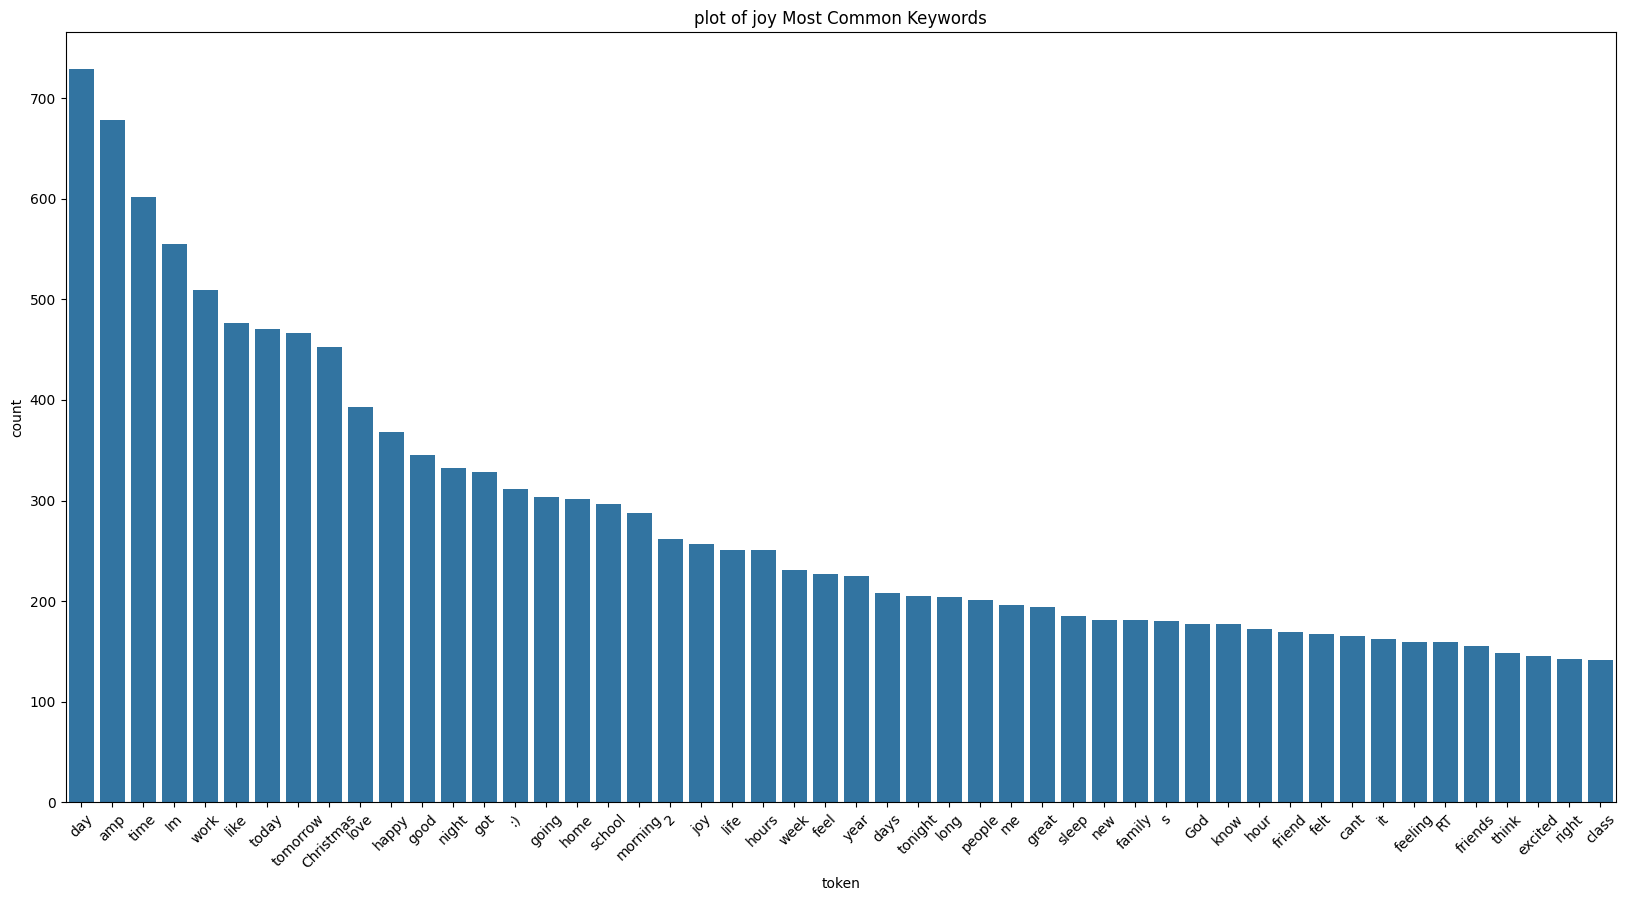

In [39]:
plot_most_common_word(keyword_joy,"joy")

In [40]:
surprise_list=df[df['Emotion']=='surprise']['Clean_Text'].tolist()

In [41]:
surprise_docx=' '.join(surprise_list)

In [42]:
surprise_docx


'maken Tip 2: Stop op een moment dat je het hele project wel ziet zitten Nu dus #derestkomtlaterwel En dan krijg je ff een cadeautje van een tweep #melike   Drummer Boy bij op verzoek van      : welke uitvoering van wie Haha course come home different house leave parents redo entire downstairs warning   reeeeeellllyyyyyyy need tell something guess what phone fucked up #gotohellmexicanphone ending pooped pants end weeks crazy ending #dEcodEd pop amp roll floor  alleen nog morgen cadootjes kopen stadje en dan helemaal klaar Im planet Im planets hold life amp discovered Good Morning Store Today #EnjoyTheDay forgot hair red looked mirror Stopped today gas small town attendant came tell quotwe #service young #tweeters clue Cant wait   open christmas prezzie #christmas Decorating entire house christmas cheer mommy Iemand nog surprise idee voor een vrouw trouble comes realise gone watching reruns living one #oh   thought Id stop SPEND CHRISTMAS HOLIDAYS LAKE Miss you chocomousse vergt 175 ml 

In [43]:
keyword_surprise=extract_keywords(surprise_docx)

In [44]:
keyword_surprise

{'en': 299,
 'een': 294,
 'de': 251,
 'Im': 227,
 ':)': 201,
 'know': 165,
 'home': 160,
 'van': 153,
 'today': 150,
 'day': 143,
 'ik': 137,
 'nog': 126,
 'love': 126,
 'got': 126,
 'met': 125,
 'amp': 124,
 'RT': 124,
 'time': 120,
 'like': 117,
 'voor': 116,
 'going': 116,
 'surprise': 114,
 'je': 110,
 'tomorrow': 105,
 'good': 101,
 'birthday': 101,
 'wait': 97,
 'het': 96,
 'night': 93,
 'actually': 93,
 'coming': 92,
 'lol': 89,
 'dan': 87,
 'Christmas': 84,
 'mom': 83,
 'u': 82,
 'think': 80,
 'friends': 79,
 'op': 76,
 'la': 74,
 ')': 74,
 '5': 73,
 'new': 72,
 'thought': 70,
 'best': 70,
 'special': 69,
 'school': 69,
 '2': 69,
 'work': 68,
 'people': 68}

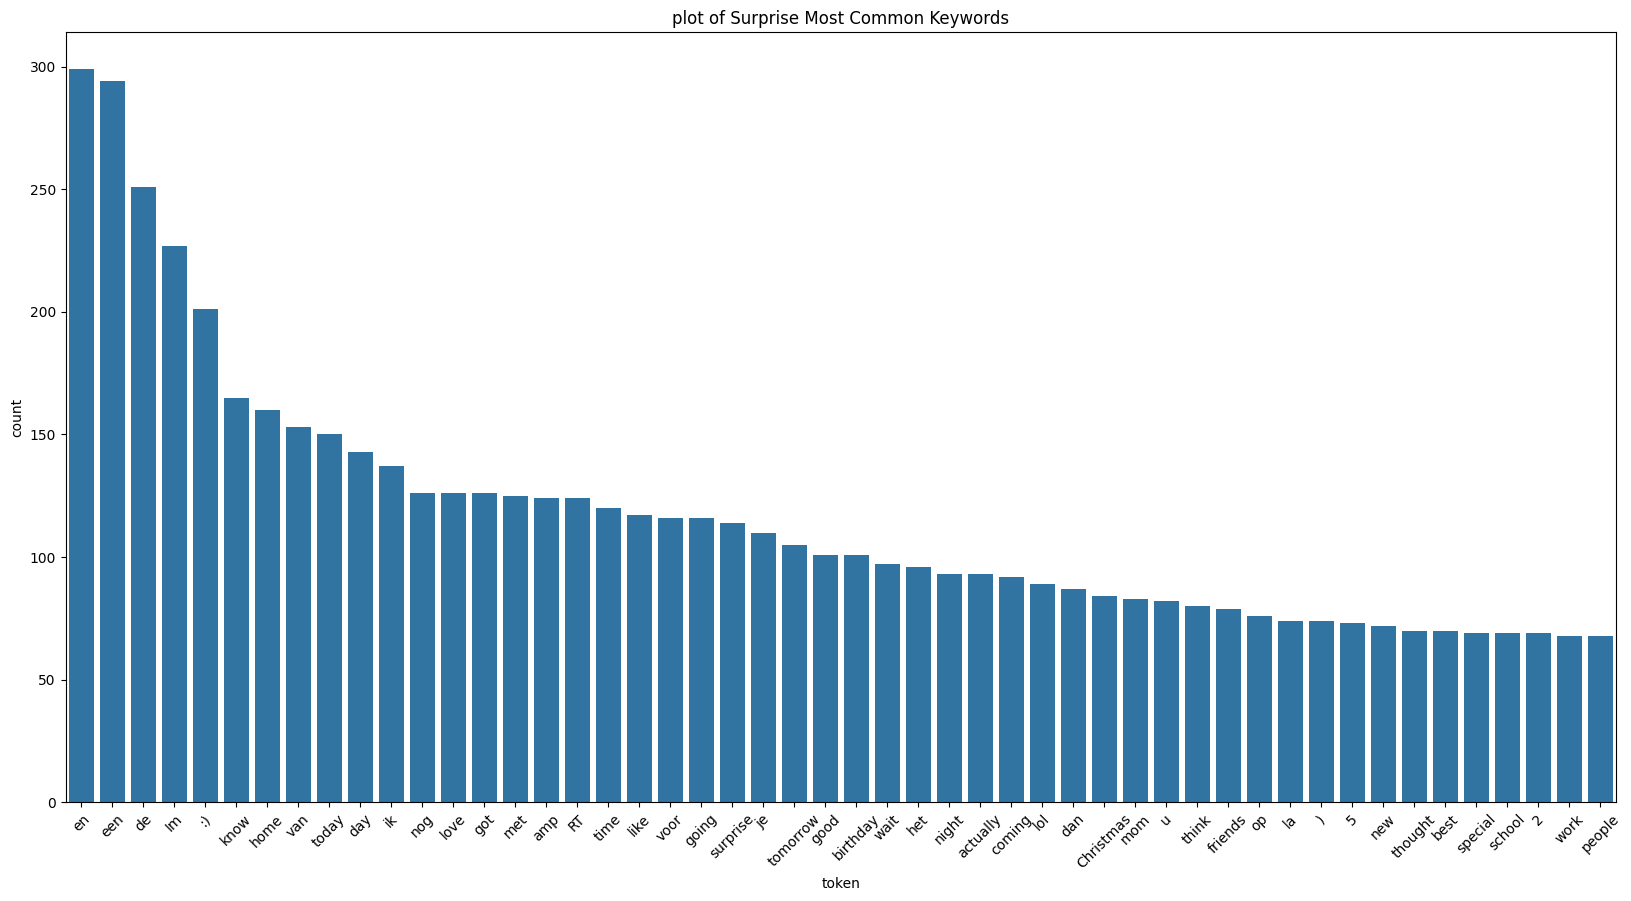

In [45]:
plot_most_common_word(keyword_surprise,"Surprise")

In [46]:
### Word Cloud
from wordcloud import WordCloud

In [47]:
def plot_wordcloud(docx):
    myswordcloud=WordCloud().generate(docx)
    plt.figure(figsize=(20,10))
    plt.imshow(myswordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

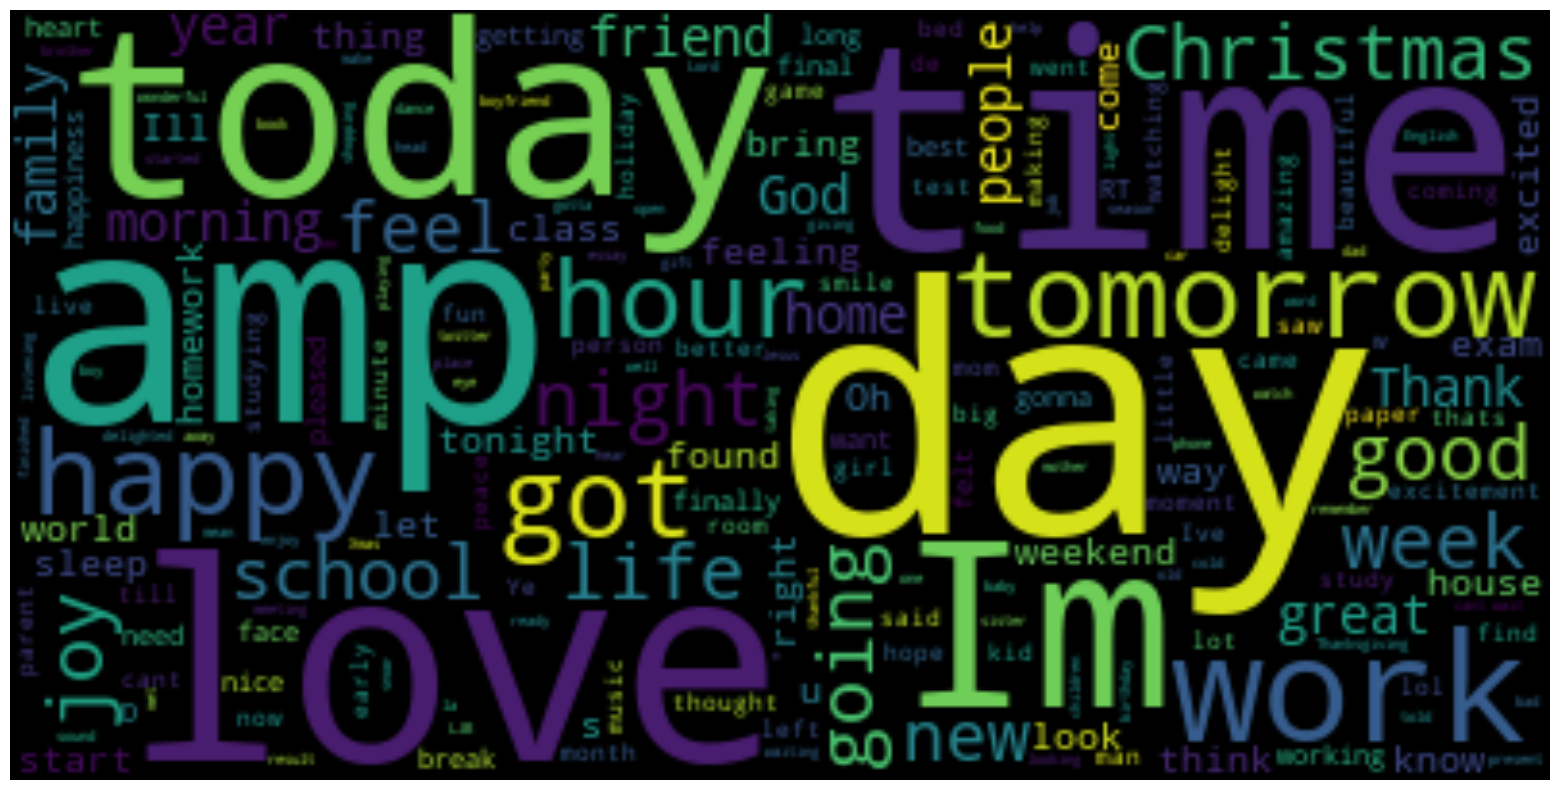

In [48]:
plot_wordcloud(joy_docx)

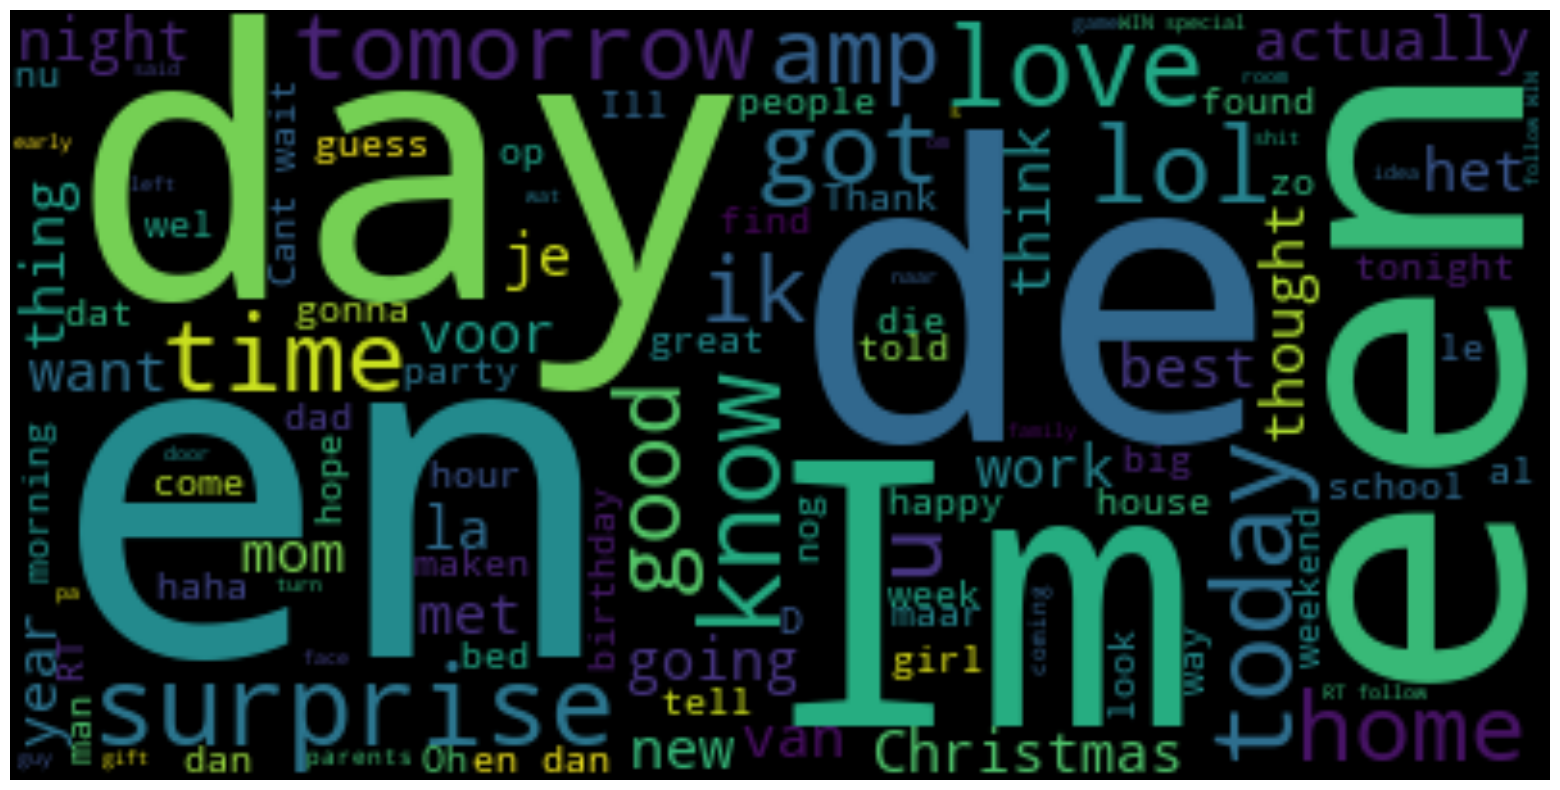

In [49]:
plot_wordcloud(surprise_docx)

### Machine Learning
+ Naive Bayes
+ LogisticRegression
+ KNN
+ Decision

#### Compare with SparkNLP/NLU John Snows Lab

In [50]:
# Load ML Package
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Vectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay  # ✅ Correct replacement for plot_confusion_matrix


In [51]:
from sklearn.model_selection import train_test_split

###build features from our  text

In [52]:
xfeature =df["Clean_Text"]
ylabels=df['Emotion']


In [53]:
xfeature


0                                                         
1                           Sage Act upgrade list tommorow
2        WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3        eye  true hazel eyeand brilliant  Regular feat...
4          ugh babe hugggzzz u  babe naamazed nga ako e...
                               ...                        
34787           gift Hope like it hand wear  Itll warm Lol
34788           world didnt meso world DEFINITELY cnt away
34789                                    man robbed today 
34790                            Youu JEALOUSY #Losing YOU
34791                                think baby dream time
Name: Clean_Text, Length: 34792, dtype: object

In [54]:
cv= CountVectorizer()
X=cv.fit_transform(xfeature)

In [55]:
# Get feature by name
cv.get_feature_names_out()  # ✅ Correct method


array(['00', '000', '000ème', ..., 'ღƪ', 'ℕoíʀ', 'ㄒʜℰℳℰ'], dtype=object)

In [56]:
X

<34792x34888 sparse matrix of type '<class 'numpy.int64'>'
	with 258117 stored elements in Compressed Sparse Row format>

In [57]:
X_train,X_test,y_train, y_test=train_test_split(X,ylabels,test_size=0.3, random_state=42)

###Build our model

In [58]:
nv_model=MultinomialNB()
nv_model.fit(X_train,y_train)

MultinomialNB()

In [59]:
#Accuracy
#Method
nv_model.score(X_test,y_test)

0.5642843456600881

In [60]:
y_pred_for_nv=nv_model.predict(X_test)

In [61]:
y_pred_for_nv

array(['fear', 'sadness', 'sadness', ..., 'sadness', 'anger', 'sadness'],
      dtype='<U8')

### Make a Single Prediction
+ Vectorized out text
+Applied our Model

In [62]:
sample_text=["I love Coding so much"]

In [63]:
vect=cv.transform(sample_text).toarray()

In [64]:
nv_model.predict(vect)

array(['joy'], dtype='<U8')

In [65]:
#check for the prediction probability percentage

In [66]:
nv_model.predict_proba(vect)

array([[7.71887420e-03, 4.32378488e-04, 6.13255211e-02, 6.78601776e-01,
        1.91245761e-04, 2.40467259e-01, 1.63388024e-06, 1.12613108e-02]])

In [67]:
#Get all class for our model
nv_model.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype='<U8')

In [68]:
np.max(nv_model.predict_proba(vect))

0.6786017763391645

In [69]:
def predict_emotion(text,model):
    myvect= cv.transform(sample_text).toarray()
    prediction=model.predict(myvect)
    pred_proba=model.predict_proba(myvect)
    pred_percentage_for_all=dict(zip(model.classes_,model.predict_proba(myvect)))
    print(prediction[0])
    return pred_percentage_for_all

In [70]:
predict_emotion(sample_text,nv_model)

joy


{'anger': array([7.71887420e-03, 4.32378488e-04, 6.13255211e-02, 6.78601776e-01,
        1.91245761e-04, 2.40467259e-01, 1.63388024e-06, 1.12613108e-02])}

In [ ]:
prediction_emotion(["He hated runnning all day"],nv_model) 